# Marker EDA

In [19]:
%matplotlib inline
import os
import os.path as osp
import celldom
import pandas as pd
import numpy as np
from skimage import io as skimage_io
from cvutils.mrcnn import dataset as mrcnn_dataset
import matplotlib.pyplot as plt
dataset_name = 'dataset03'
dataset_dir = celldom.get_dataset_dir()
marker_data_dir = osp.join(dataset_dir, dataset_name, 'MarkerTraining')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
x = pd.Series([1,2.5,3,4]).values
x = np.ediff1d(x, to_begin=x[0] - x[-1])

array([-3. ,  1.5,  0.5,  1. ])

In [22]:
marker_image_paths = !ls $marker_data_dir/*.tif
marker_image_paths

['/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_000_z_0.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_000_zm3.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_000_zm6.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_000_zm9.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_000_zp3.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_000_zp6.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_000_zp9.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_046_z_0.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_046_zm3.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_046_zm6.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_046_zm9.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_046_zp3.tif',
 '/lab/data/celldom/data/dataset03/MarkerTraining/BF_ST_000_APT_

In [23]:
dataset = mrcnn_dataset.RectLabelDataset()
dataset.initialize(marker_image_paths, ['Marker'], 'markers')
dataset.prepare()

In [164]:
img = dataset.load_image(0)[..., 0]
img.shape


def get_bbox_for_mask(mask):
    ly, lx, uy, ux = list(np.argwhere(mask).min(axis=0)) + list(np.argwhere(mask).max(axis=0))
    return ly, lx, uy, ux

masks = dataset.load_mask(0)[0]
mask = masks[..., 1]
ly, lx, uy, ux = get_bbox_for_mask(mask)
mask_img = img[ly:uy, lx:ux]
plt.imshow(mask)

(1024, 1376)

In [170]:
from skimage import morphology
from skimage import transform

def prep_marker_img(img):
    img = rank.median(img)
    disk = morphology.disk(radius=np.array(img.shape).min() // 3)
    disk = transform.resize(disk, img.shape, mode='constant', order=1)
    return img * disk

def get_weighted_centroid(img):
    if np.any(img < 0):
        raise ValueError('Image must be non-negative to use for weighted centroid calculation')
    row, col = np.indices(img.shape[:2])
    return np.average(row, weights=img), np.average(col, weights=img)

/usr/local/lib/python3.5/dist-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


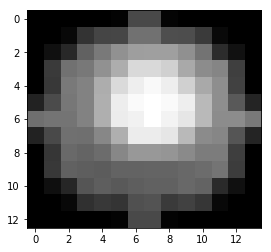

In [174]:
plt.imshow(prep_marker_img(mask_img))

In [175]:
get_weighted_centroid(prep_marker_img(mask_img))

/usr/local/lib/python3.5/dist-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


(5.668606401587977, 6.700534918409574)